# Volume 4: Spectral 2
    Benj McMullin
    Math 439
    1/25/2024

In [1]:
import numpy as np
from scipy.fftpack import fft, ifft
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Sample Code

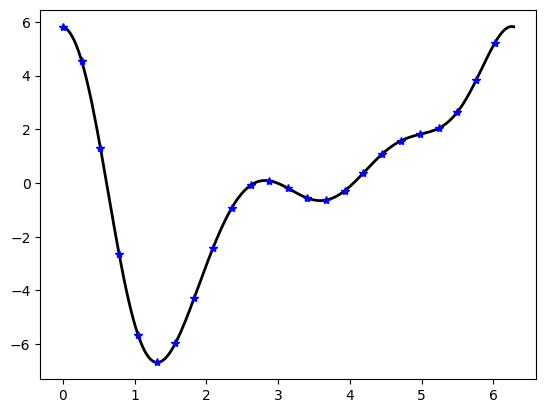

In [2]:
N=24
x1 = (2.*np.pi/N)*np.arange(N)
f = np.sin(x1)**2.*np.cos(x1) + np.exp(2.*np.sin(x1+1))

k = np.concatenate(( np.arange(0,N/2) ,
                    np.array([0]) , # Because hat{f}'(k) at k = N/2 is zero.
                    np.arange(-N/2+1,0) ))

# Approximates the derivative using the pseudospectral method
f_hat = fft(f)
fp_hat = ((1j*k)*f_hat)
fp = np.real(ifft(fp_hat))

# Calculates the derivative analytically
x2 = np.linspace(0,2*np.pi,200)
derivative = (2.*np.sin(x2)*np.cos(x2)**2. -
              np.sin(x2)**3. +
              2*np.cos(x2+1)*np.exp(2*np.sin(x2+1))
             )

plt.plot(x2,derivative,'-k',linewidth=2.)
plt.plot(x1,fp,'*b')
plt.show()

# Problem 1

Create a function
that approximates 1/2u'' − u' on the Fourier grid points for N = 24.

In [3]:
# Approximates the second derivative using the pseudospectral method
fp_hat = fft(fp)
fpp_hat = ((1j * k * fp_hat))
fpp = np.real(ifft(fpp_hat))

# Calculates the second derivative analytically
x2 = np.linspace(0, 2 * np.pi, 200)
second_derivative = (2 * np.cos(2 * x2) * np.cos(x2) -
              np.sin(x2) * np.sin(2 * x2) -
              3 * np.sin(x2) ** 2 * np.cos(x2) +
              2 * (2 * np.exp(2 * np.sin(x2 + 1)) * np.cos(x2 + 1) ** 2 -
              np.sin(x2 + 1) * np.exp(2 * np.sin(x2 + 1))))

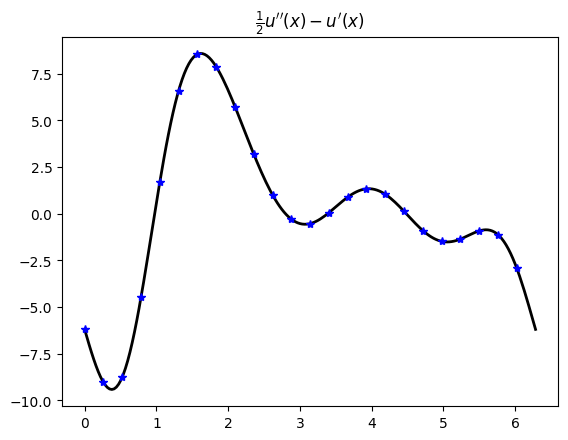

In [4]:
plt.plot(x2, second_derivative / 2 - derivative, '-k', linewidth = 2.)
plt.plot(x1, fpp / 2 - fp, '*b')
plt.title(r"$\frac{1}{2}u''(x)-u'(x)$")
plt.show()

# Problem 2 
Using a solve_ivp, solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 8 over 250 time steps and 200 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

In [5]:
def initialize_all(a,b,y0,h):
    n = int((b-a)/h+1)
    X = np.linspace(a,b,n)
    if isinstance(y0,np.ndarray):
        Y = np.empty((n, y0.size))
    else:
        Y = np.empty(n)
    Y[0] = y0
    return X,Y,h,int(n)

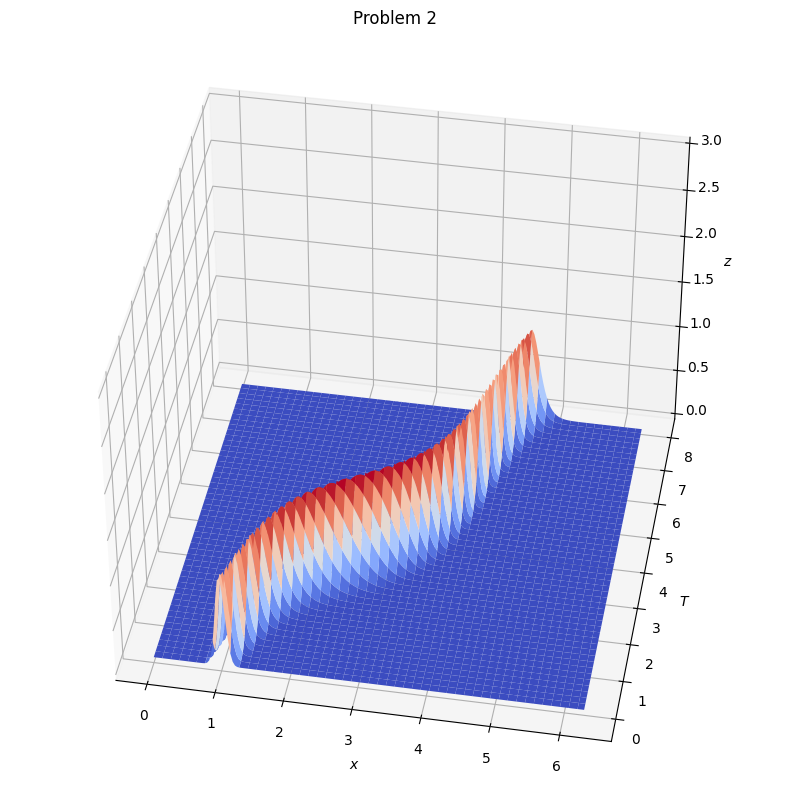

In [10]:
t_steps = 250
x_steps = 200
t_domain = np.linspace(0, 8, t_steps)
x_domain = np.linspace(0, 2 * np.pi, x_steps)
N = 200

k = np.concatenate((np.arange(0, N // 2),
                    np.array([0]),
                    np.arange(-N // 2 + 1, 0)))

c = lambda x: 0.2 + np.sin(x - 1) ** 2
u0 = lambda x: np.exp(-100 * (x - 1) ** 2)

def f(t, U):
    return np.real(-c(x_domain) * ifft((1j * k) * fft(U)))

sol = solve_ivp(f, [0, 8], y0=u0(x_domain), method='RK45', t_eval=t_domain)

X, T = np.meshgrid(x_domain, t_domain)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, T, np.transpose(sol.y), cmap='coolwarm')
ax.set_zlim(0, 3)
ax.view_init(elev=40, azim=280)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$T$')
ax.set_zlabel(r'$z$')
plt.title('Problem 2')
plt.show()

# Problem 3
Using a solve_ivp, solve the initial value problem. 
Plot your numerical solution from
t = 0 to t = 3 over 150 time steps and 100 x steps. Note that the initial data is nearly zero
near x = 0 and 2π, and so we can use the pseudospectral method. a Use the following code to
help graph.

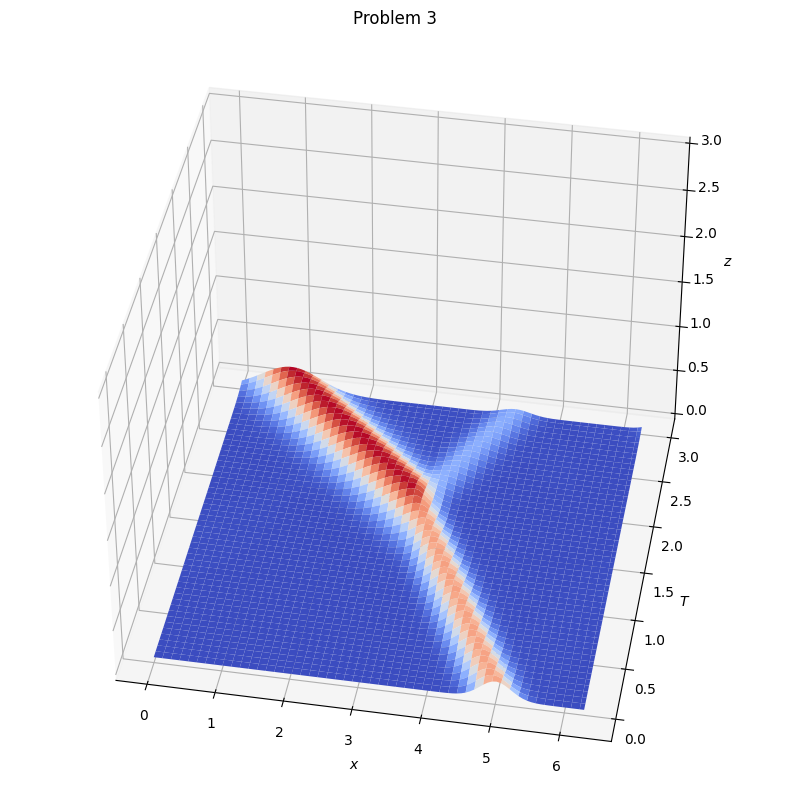

In [11]:
t_steps = 150
x_steps = 100
t_domain = np.linspace(0, 3, t_steps)
x_domain = np.linspace(0, 2 * np.pi, x_steps)
N = 100

# Set up the wavenumbers
k = np.concatenate((np.arange(0, N // 2),
                    np.array([0]),
                    np.arange(-N // 2 + 1, 0)))

# Set up the wave speed and initial condition
C = np.vectorize(lambda x: 4 if x < np.pi else 1)
u0 = lambda x: 0.2 * np.exp(-10 * (x - 5) ** 2)
ut = lambda x: -4 * (x - 5) * np.exp(-10 * (x - 5) ** 2)

# Set up the initial condition
u = np.concatenate((u0(x_domain), ut(x_domain)))

# Set up the function
def f(t, U):
    return np.concatenate((U[x_steps:], np.real(C(x_domain) * ifft((1j * k) ** 2 * fft(U[:x_steps])))))

# Solve the problem
sol = solve_ivp(f, [0, 3], y0=u, method='RK45', t_eval=t_domain)

# Plot the solution
X, T = np.meshgrid(x_domain, t_domain)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection="3d")
surf = ax.plot_surface(X, T, np.transpose(sol.y[:x_steps]), cmap='coolwarm')
ax.set_zlim(0, 3)
ax.view_init(elev=40, azim=280)
ax.set_xlabel('$x$')
ax.set_ylabel('$T$')
ax.set_zlabel('$z$')
plt.title('Problem 3')
plt.show()